In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqldf

In [3]:
hip_hop_death_df = pd.read_csv('./clean_hip_hop_singers_death.csv')

In [4]:

base_color = sns.color_palette()[4]

In [5]:
hip_hop_death_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            60 non-null     object
 1   death_date      60 non-null     object
 2   age             60 non-null     int64 
 3   death_location  60 non-null     object
 4   death_cause     60 non-null     object
 5   year            60 non-null     int64 
 6   country         60 non-null     object
 7   state           60 non-null     object
dtypes: int64(2), object(6)
memory usage: 3.9+ KB


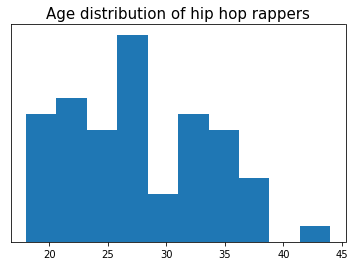

In [6]:
plt.hist(hip_hop_death_df.age, bins=10)
plt.title('Age distribution of hip hop rappers', fontsize=15)
plt.yticks([])

plt.show()

In [7]:
hip_hop_death_df.country.value_counts()

USA             46
Canada           3
Brazil           2
Puerto Rico      2
Mexico           1
Greece           1
England          1
South Africa     1
Netherlands      1
Sweden           1
India            1
Name: country, dtype: int64

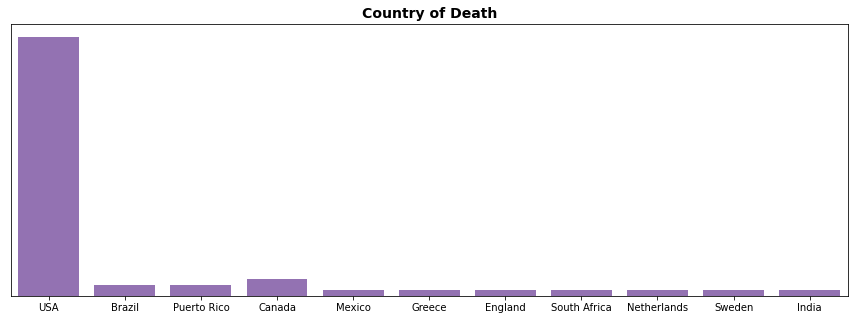

In [8]:
plt.figure(figsize=(15,5))
sns.countplot(data=hip_hop_death_df, x='country', color=base_color)
plt.title('Country of Death', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
plt.show()

In [9]:
death_trend = "select year, count(*) as number_of_deaths from hip_hop_death_df group by year order by year desc"

sqldf.run(death_trend)

,year,number_of_deaths
0,2022,7
1,2021,3
2,2020,5
3,2019,3
4,2018,4
5,2016,2
6,2015,3
7,2013,4
8,2012,2
9,2011,1


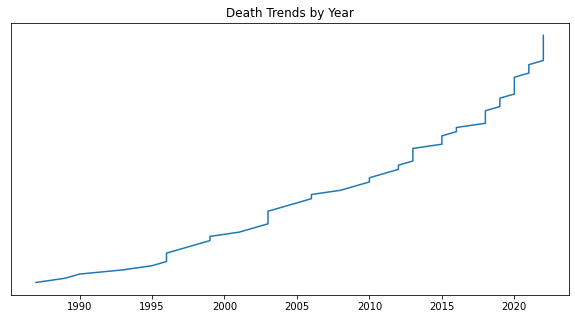

In [10]:
plt.figure(figsize=(10,5))

plt.plot(hip_hop_death_df.year, hip_hop_death_df.index)
plt.title('Death Trends by Year')
plt.yticks([])
plt.show()

In [11]:
top_usa_cities = """select state, count(*) as death_count from hip_hop_death_df where country = 'USA' group by state 
order by death_count desc"""

In [12]:
deaths_in_USA_states = sqldf.run(top_usa_cities)

deaths_in_USA_states

,state,death_count
0,California,9
1,New York,8
2,Texas,7
3,Georgia,6
4,Louisiana,5
5,Missouri,2
6,Michigan,2
7,Florida,2
8,Tennessee,1
9,Pennsylvania,1


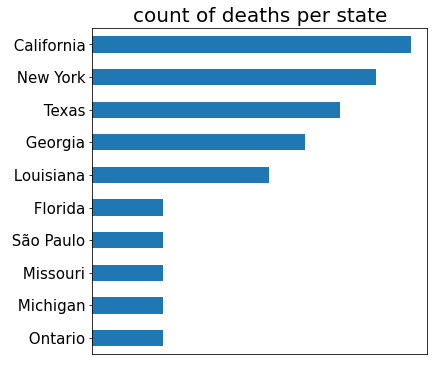

In [13]:
hip_hop_death_df['state'].value_counts()[:10].plot(kind='barh', x='state', figsize=(6,6), fontsize=15, legend=False).invert_yaxis()
plt.ylabel('')
plt.xticks([])

plt.title('count of deaths per state', fontsize=20)
plt.show()

In [14]:
hip_hop_death_df.death_cause.value_counts()

Shooting                         51
Stabbing                          4
Drive by shooting                 2
Shooting during home invasion     2
Unspecified violence              1
Name: death_cause, dtype: int64

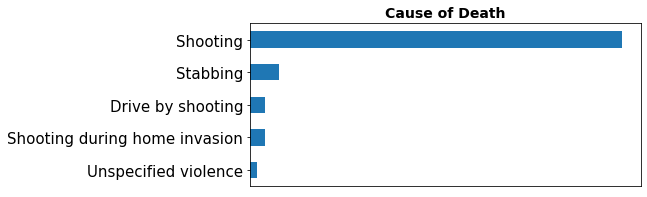

In [19]:
hip_hop_death_df['death_cause'].value_counts().plot(kind='barh', y='death_cause', figsize=(7,3), fontsize=15, legend=False).invert_yaxis()
plt.xlabel('')
plt.xticks([])
plt.title('Cause of Death', fontsize=14, fontweight='bold')

plt.show()

In [16]:
hip_hop_death_df[hip_hop_death_df.age <= 20]

,name,death_date,age,death_location,death_cause,year,country,state
3,Charizma,1993-12-16,20,"Milpitas, California, U.S.",Shooting,1993,USA,California
7,Yaki Kadafi,1996-11-10,19,"Orange, New Jersey, U.S.",Shooting,1996,USA,New Jersey
28,Lil Phat,2012-06-07,19,"Sandy Springs, Georgia, U.S.",Shooting,2012,USA,Georgia
29,MC Daleste,2013-07-07,20,"Paulínia, São Paulo, Brazil",Shooting,2013,Brazil,São Paulo
31,Depzman,2013-09-21,18,"Birmingham, West Midlands, England",Stabbing,2013,England,West Midlands
38,XXXTentacion,2018-06-18,20,"Deerfield Beach, Florida, U.S.",Shooting,2018,USA,Florida
45,Pop Smoke,2020-02-19,20,"Los Angeles, California, U.S.",Shooting during home invasion,2020,USA,California
50,Einár,2021-10-21,19,"Stockholm, Sweden",Shooting,2021,Sweden,Stockholm


In [17]:
hip_hop_death_df[(hip_hop_death_df.age > 20) & (hip_hop_death_df.age <= 25)].set_index('name')

,death_date,age,death_location,death_cause,year,country,state
name,,,,,,,
Scott La Rock,1987-08-27,25,"New York City, New York, U.S.",Shooting,1987,USA,New York
Paul C,1989-07-17,24,"New York City, New York, U.S.",Shooting,1989,USA,New York
"Danny ""D-Boy"" Rodriguez",1990-10-06,22,"Dallas, Texas, U.S.",Shooting,1990,USA,Texas
Tupac Shakur,1996-09-13,25,"Las Vegas, Nevada, U.S.",Drive by shooting,1996,USA,Nevada
The Notorious B.I.G.,1997-03-09,24,"Los Angeles, California, U.S.",Drive by shooting,1997,USA,California
Big L,1999-02-15,24,"New York City, New York, U.S.",Shooting,1999,USA,New York
Camoflauge,2003-05-19,21,"Savannah, Georgia, U.S.",Shooting,2003,USA,Georgia
Dolla,2009-05-18,21,"Los Angeles, California, U.S.",Shooting,2009,USA,California
Lele,2010-07-01,23,"Trujillo Alto, Puerto Rico",Shooting,2010,Puerto Rico,Trujillo Alto
